# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint
## Not for grading

## Objectives

At the end of the experiment, you will be able to 

* Find a low-dimensional representation of the data that retains as much information as possible.

### Challenges

When we use the data with a large number of features or dimensionality, models usually choke because

    1. Training time increases exponentially with the number of features.
    2. Models have an increased risk of overfitting with an increasing number of features.

To avoid the above-mentioned problems while learning about data analysis, we use simple, well behaved, data that reduces the cognitive load, and makes it easier to debug as we are able to better comprehend the data we are working with.

###AI/ML Technique


The data can be essentially be reduced to a single line by projecting the data points on its axis. The line is a vector that defines the direction of the greatest variance, which means the largest eigenvalue.

![alt text](https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/1.png)

### Setup Steps

In [ ]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2100121" #@param {type:"string"}


In [ ]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "5142192291" #@param {type:"string"}


In [ ]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

ipython = get_ipython()
  
notebook= "Demo_Dimensions" #name of the notebook
Answer = "Ungraded"
def setup():
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "feedback_experiments_input" : Comments, "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        # print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
    
else:
  print ("Please complete Id and Password cells before running setup")


Setup completed successfully


In [ ]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

## Load and Visualize Original data

### Randomly constructing 2D array. 

Generate 20 random samples of an array with size 2. 

In [ ]:
rng=np.random.RandomState(0)

# Generate a matrix with 10 rows and 2 columns
X=rng.randn(2,20)
print("Shape of the original data",X.shape)
print(X)
print(X.shape)
print(X.size)
print(X[::2])

Shape of the original data (2, 20)
[[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
   0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
   0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
   0.3130677  -0.85409574]
 [-2.55298982  0.6536186   0.8644362  -0.74216502  2.26975462 -1.45436567
   0.04575852 -0.18718385  1.53277921  1.46935877  0.15494743  0.37816252
  -0.88778575 -1.98079647 -0.34791215  0.15634897  1.23029068  1.20237985
  -0.38732682 -0.30230275]]
(2, 20)
40
[[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
   0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
   0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
   0.3130677  -0.85409574]]


### Visualize Original Data

Plot the data points using a scatter plot



[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574]


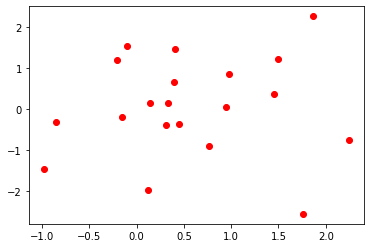

In [ ]:
plt.scatter(X[0,:], X[1,:], color='r');
print(X[0,:])

In [ ]:
# Calculate the standard deviation of the data points
X[0,:].std(), X[1,:].std()

(0.8501828003994658, 1.1878206667325133)

## Projection on x-axis

Project all data points on the unit vector U1, representing the line. Consider the unit vector is in the direction of the x-axis and drop all data points onto the x-axis by drawing a perpendicular line (dotted line) from that point.

Then dot product of data samples (X) and a unit vector (U1) gives the vectors of projection or new axis (Z1)

Z1 = U1 * X

Then calculate the variance of the new projected axis (Z1)



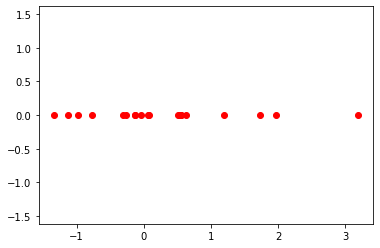

In [ ]:
scale=np.array([[0.85,0], [0,1.18]])  # Standard deviations are 0.85 and 1.18
rotate=np.array([[1,-1], [0, 0]]) / math.sqrt(2) # projecting points on x axis

# Unit vector U1 
U1 = np.dot(rotate, scale)
# Dot product of U1 and X
Z1 = np.dot(U1, X)
# Plot the new axis

plt.axis('equal')
plt.scatter(Z1[0,:], Z1[1,:], color='r');

Find the variance of the new axis, Z1, which is in the direction of the x-axis

In [ ]:
def variance(data):
  n = len(data)
  data = data.reshape(-1,1)
  # Mean of the data
  mean = sum(data) / n
  # Square deviations
  deviations = [(x - mean) ** 2 for x in data]
  # Variance
  variance = sum(deviations) / n
  return variance

In [ ]:
variance1 = variance(Z1)
print("Variance in the direction of x-axis is: ", variance1)

Variance in the direction of x-axis is:  [169.78678985]


## Projection on y-axis

Similarly, project the points defined by the unit vector U2, which is in the direction of the y-axis. Then do the dot product of unit vector (U2) with the data points (X) to get the vectors of projection or new axis (Z2) and then calculate the variance.

Z2 = U2 * X

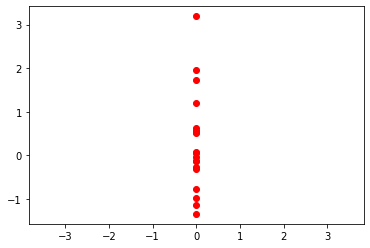

In [ ]:
scale=np.array([[0.85,0], [0,1.18]])  # Standard deviations are 0.85 and 1.18
rotate=np.array([[0,0], [1,-1]]) / math.sqrt(2) # projecting points on y axis

# Unit vector U2 
U2 = np.dot(rotate, scale)

# Dot product of U2 and X
Z2 = np.dot(U2, X)
Z2 = Z2.T
# Plot the new axis
plt.axis('equal')
plt.scatter(Z2[:,0], Z2[:,1], color='r');

In [ ]:
variance2 = variance(Z2)
print("Variance in the direction of y-axis is: ", variance2)

Variance in the direction of y-axis is:  [1.24230721]


## Project the data in another direction at an angle of 45 degrees

Similarly, project the points defined by the unit vector U3 at an angle of 45 degrees. Then do the dot product of data samples (X) and a unit vector (U3) to get the vectors of projection or new axis (Z3) and then calculate the variance.

Z3 = U3 * X

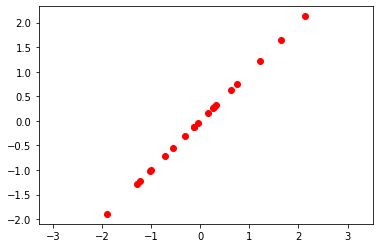

In [ ]:
scale=np.array([[0.85,0], [0,1.18]])  # Standard deviations are 0.85 and 1.18
rotate=np.array([[0,-1], [0,-1]]) / math.sqrt(2) # projecting at an angle 45 degrees

# Unit vector U3 
U3 = np.dot(rotate, scale)

# Dot product of U3 and X
Z3 = np.dot(U3, X)
Z3 = Z3.T
# Plot the new axis
plt.axis('equal')
plt.scatter(Z3[:,0], Z3[:,1], color='r');

In [ ]:
variance3 = variance(Z3)
print("Variance in the direction at an angle 45 : ", variance3)

Variance in the direction at an angle 45 :  [1.45334583]


**The variance along X-axis is high compared to other projected directions. The direction of greatest variance is the eigenvector itself that has the largest eigenvalue.**

## Exercise: Project the points in another direction at an angle of 135 degrees

* Project the points on unit vector, where U4 = [[1,0],[-1,0]]
* Perform dot project of U4 and X
* Transpose the new projected axis and then visualize the projected axis
* Calculate the variance


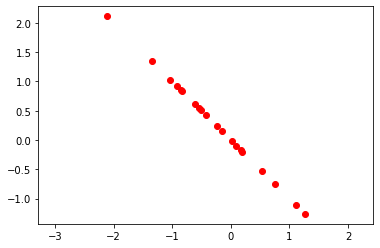

In [ ]:
scale=np.array([[0.85,0], [0,1.18]])  # Standard deviations are 0.85 and 1.18
rotate=np.array([[-0.7,-0.7], [0.7,0.7]]) / math.sqrt(2) # projecting at an angle 135 degrees

# Unit vector U3 
U3 = np.dot(rotate, scale)

# Dot product of U3 and X
Z3 = np.dot(U3, X)
Z3 = Z3.T
# Plot the new axis
plt.axis('equal')
plt.scatter(Z3[:,0], Z3[:,1], color='r');

In [ ]:
variance3 = variance(Z3)
print("Variance in the direction at an angle 135 : ", variance3)

Variance in the direction at an angle 135 :  [1.45334583]


## Please answer the questions below to complete the experiment:

In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Too Simple, I am wasting time" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "Good for more examples to practice the theory knowledge " #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook  { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 3376
Date of submission:  13 Sep 2020
Time of submission:  12:25:10
View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions
